In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from statsmodels.tsa.holtwinters import Holt,SimpleExpSmoothing,ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
data=pd.read_csv("D:\DATA SCIENCE\ASSIGNMENT\QUESTION\FORECASTING\Airlines+Data.csv",)

In [8]:
data

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


<Axes: >

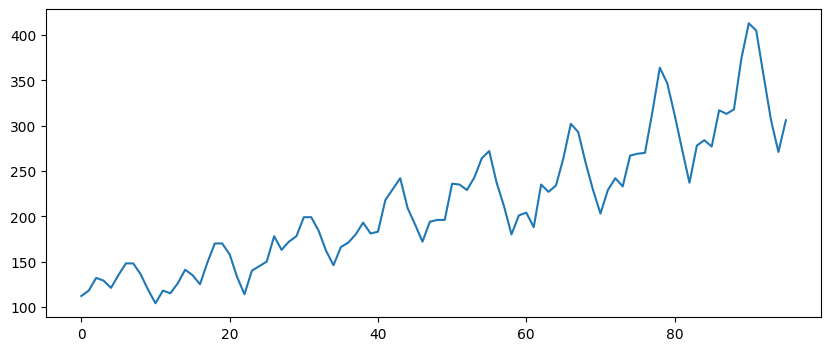

In [10]:
plt.figure(figsize=(10,4))
data.Passengers.plot()

<Axes: >

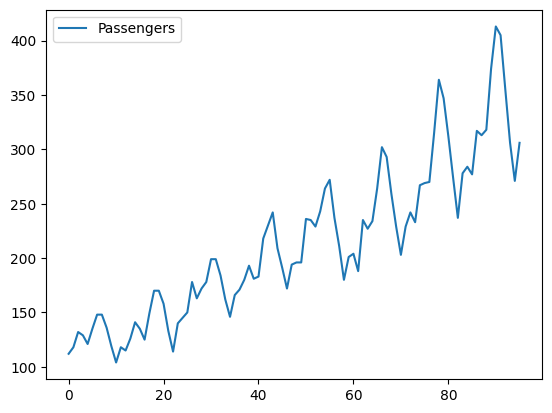

In [11]:
data.plot()

<Figure size 1000x600 with 0 Axes>

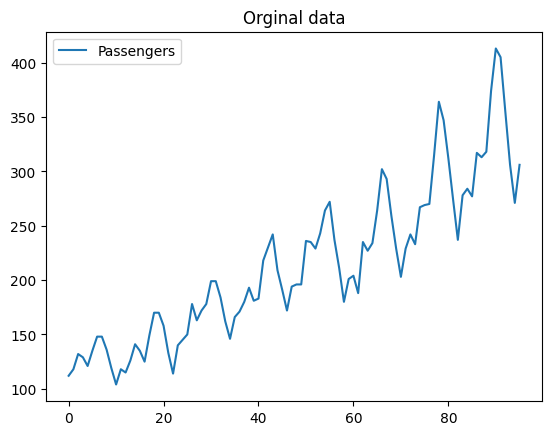

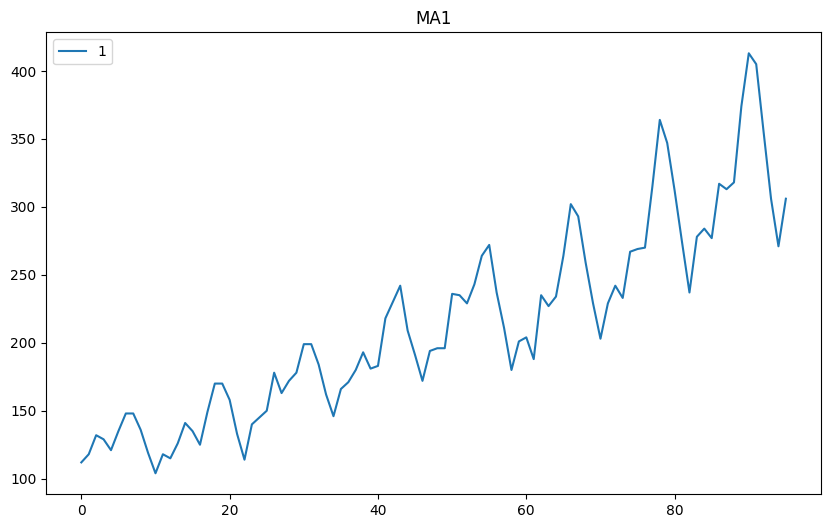

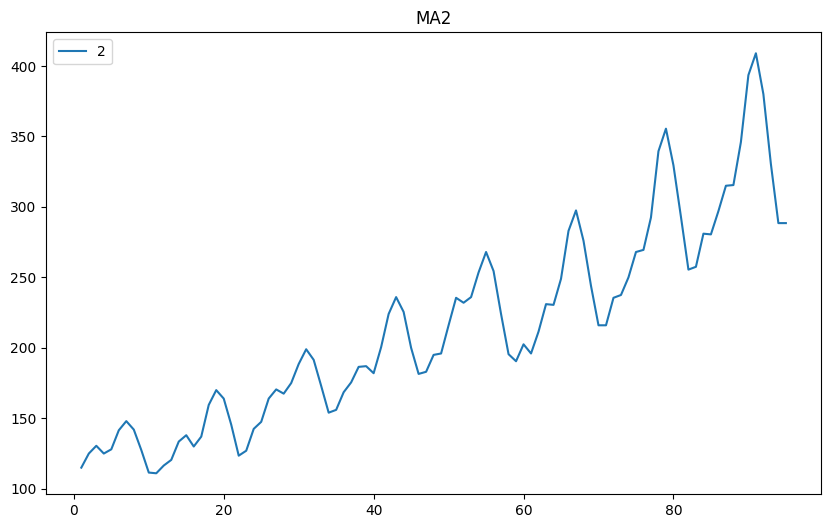

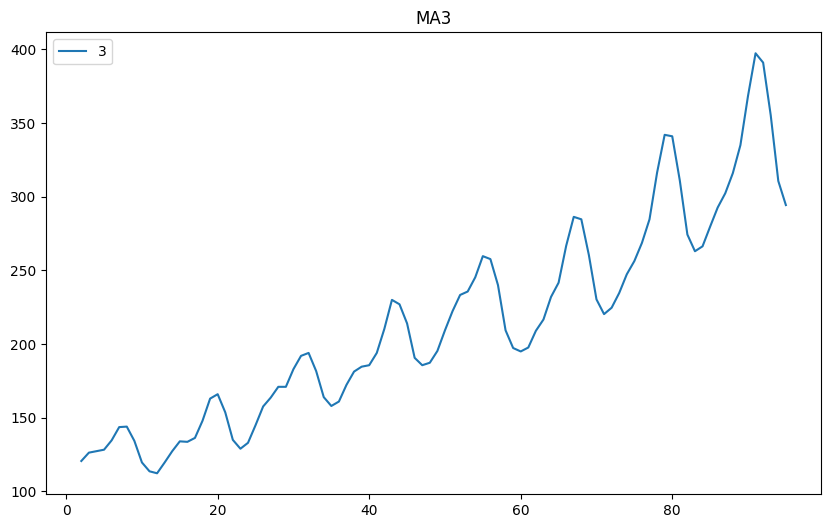

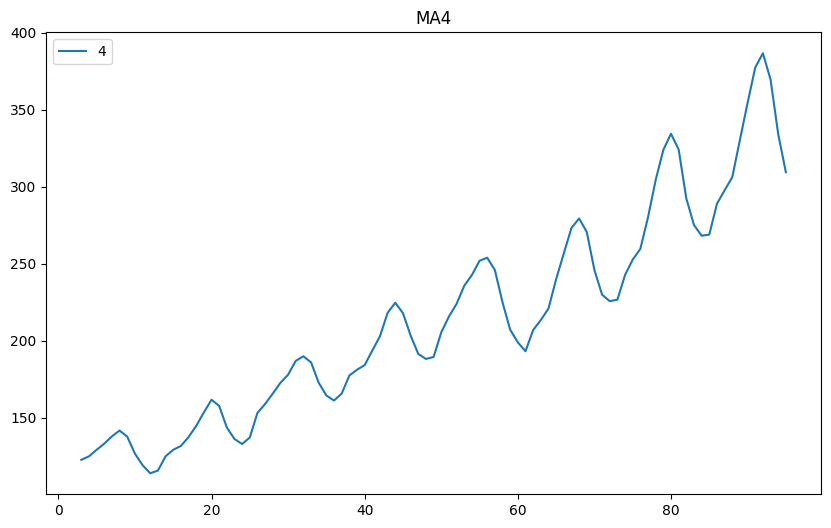

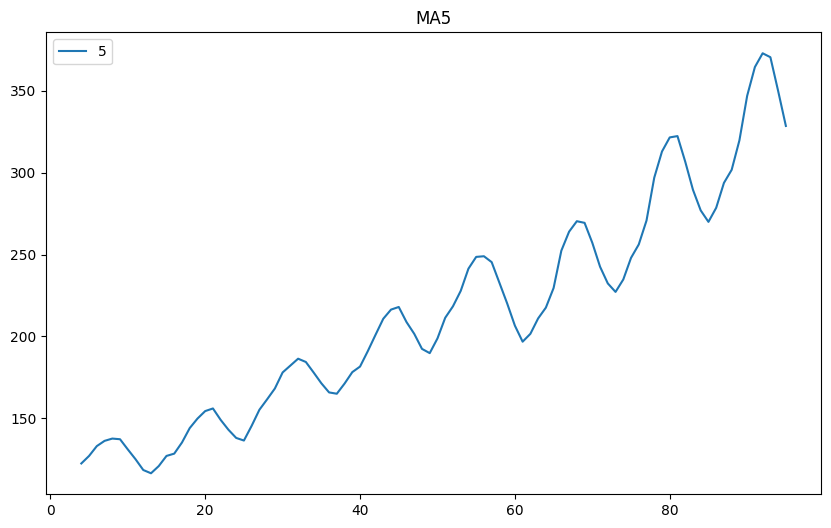

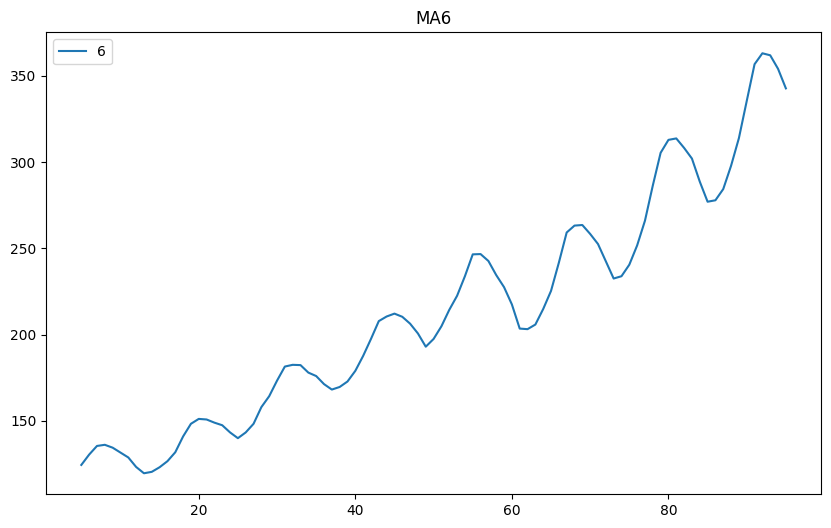

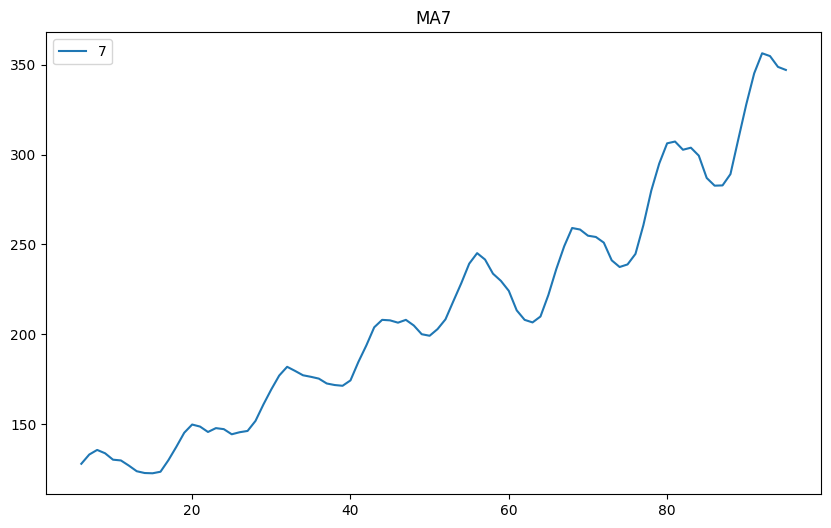

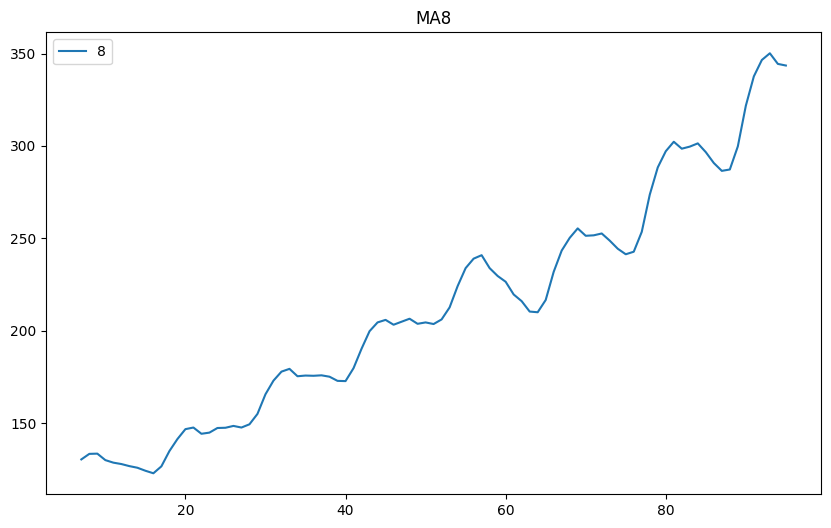

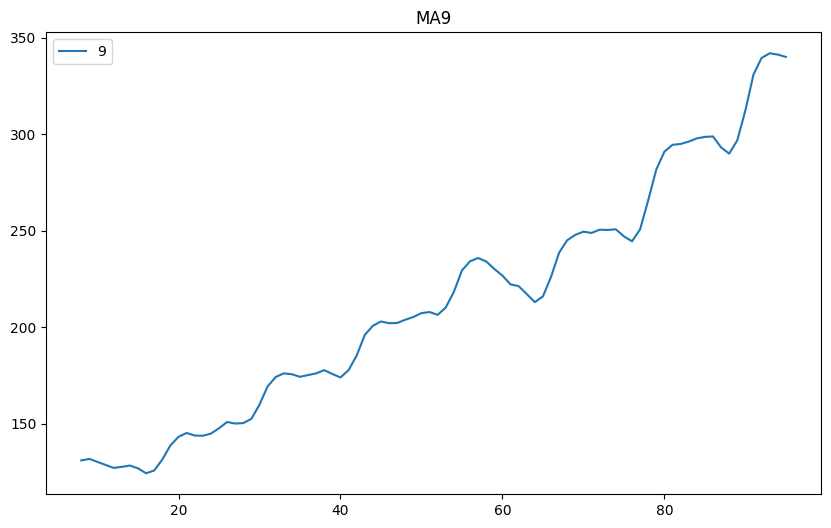

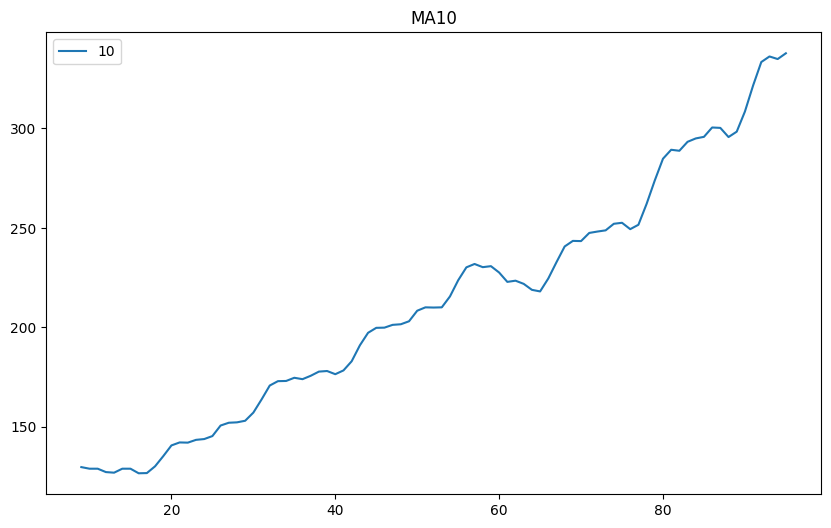

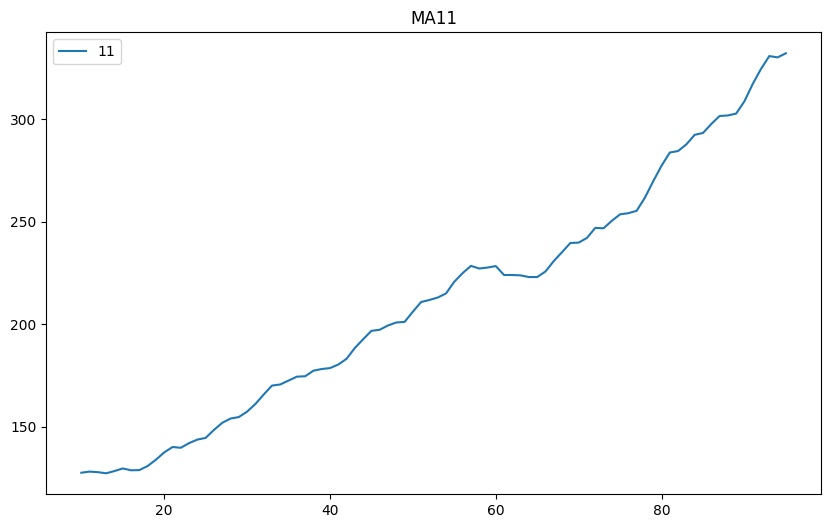

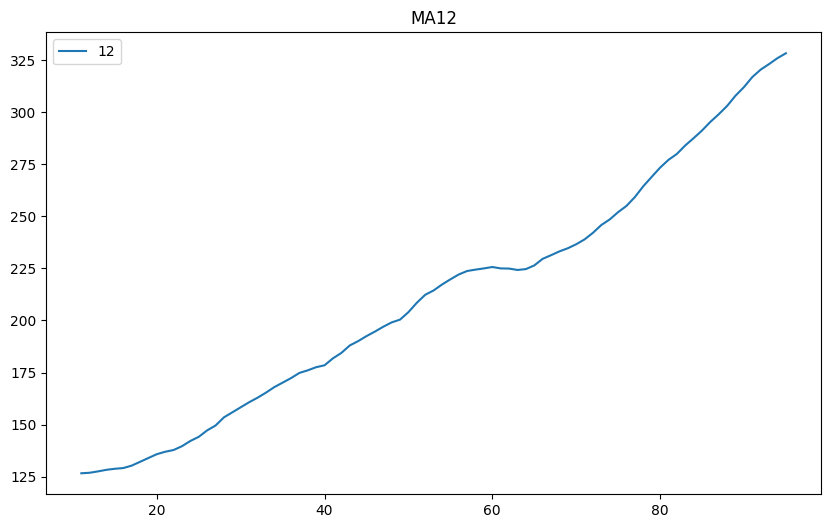

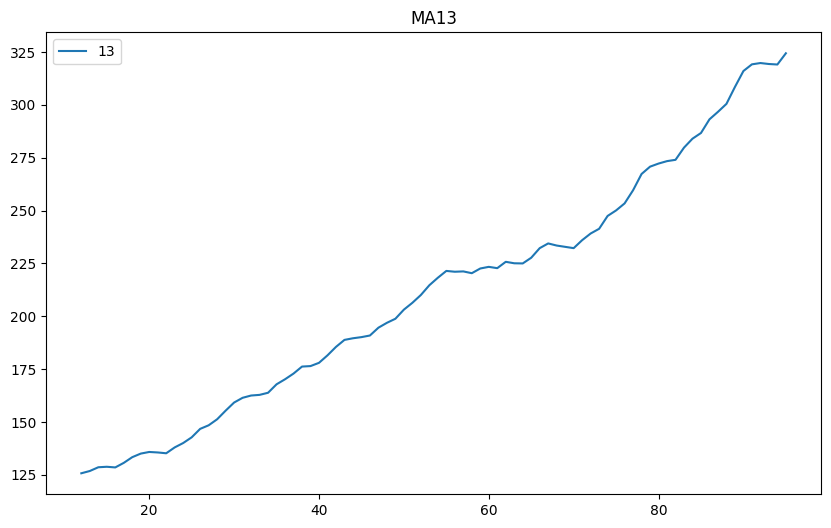

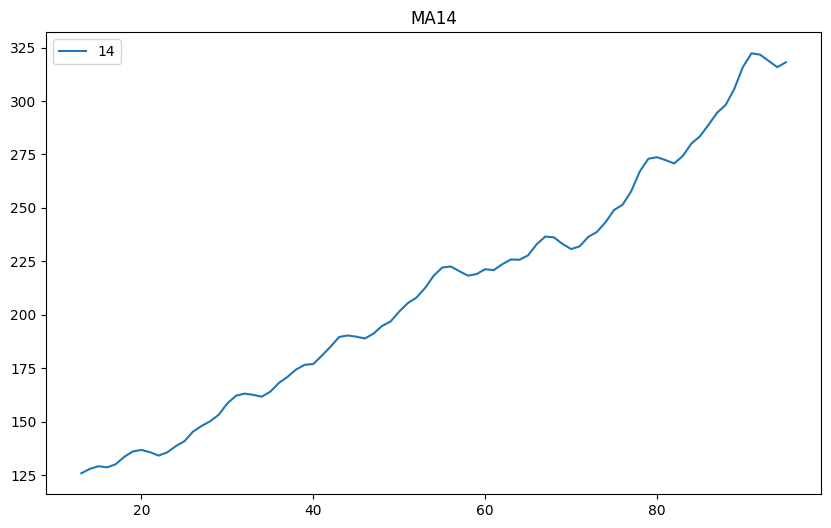

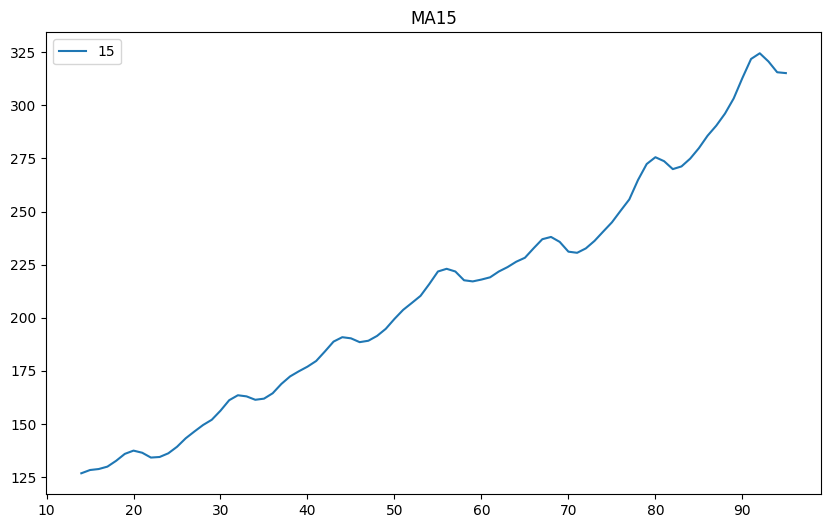

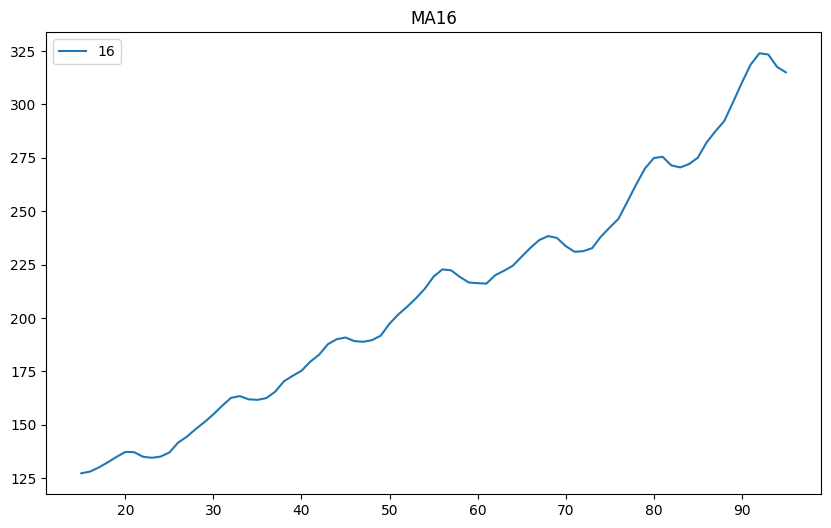

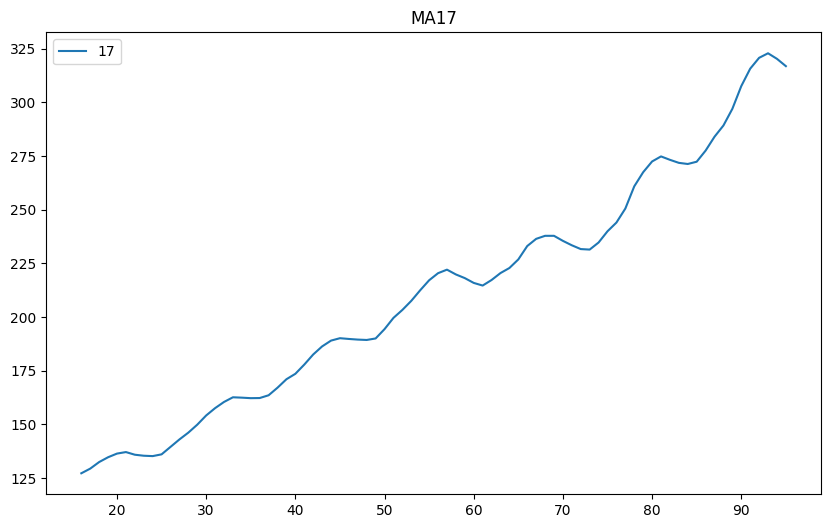

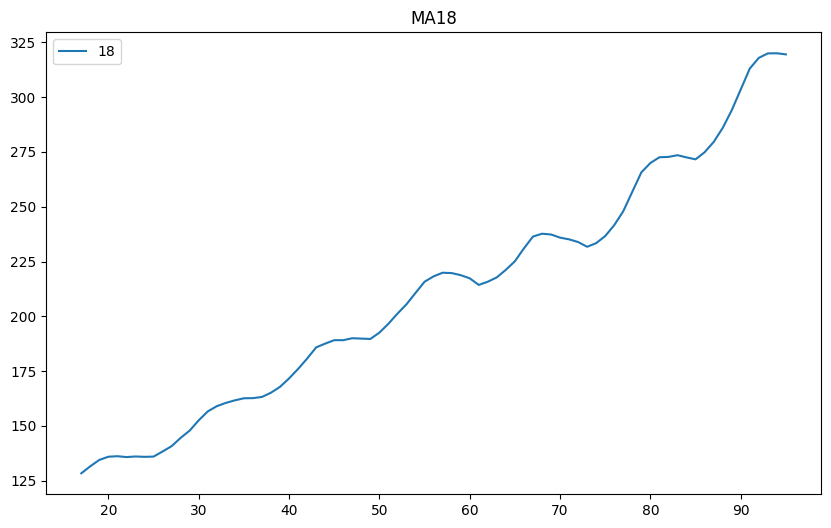

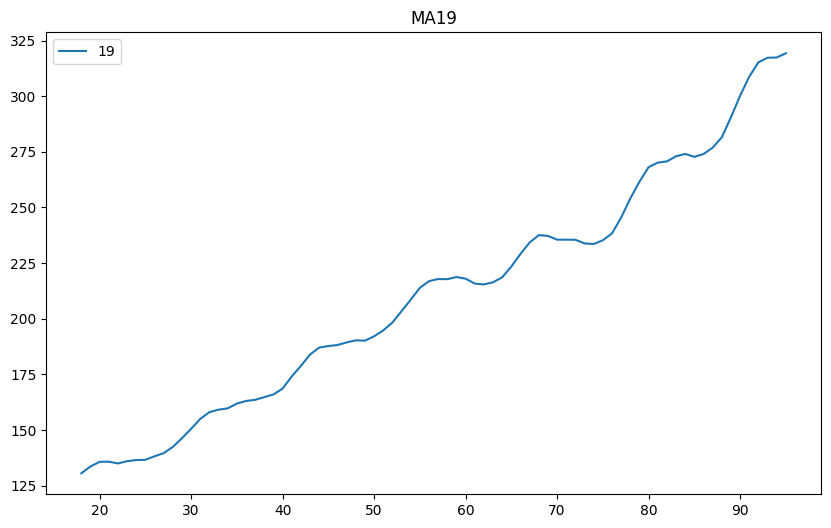

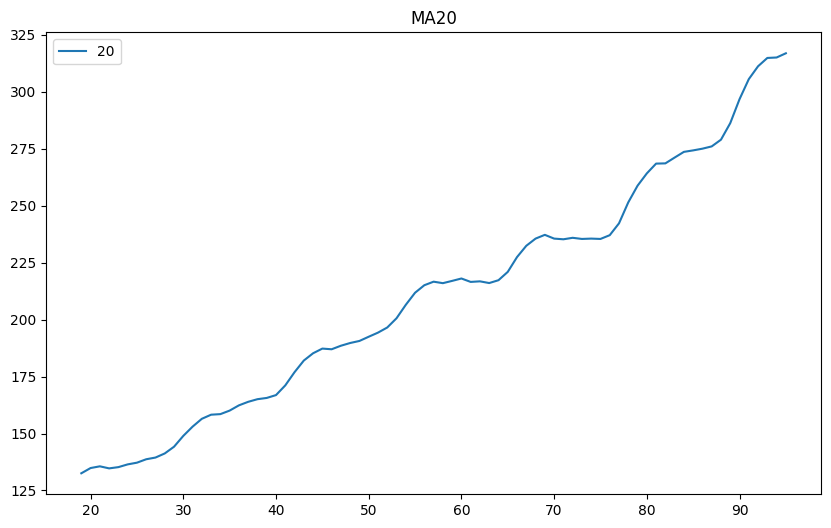

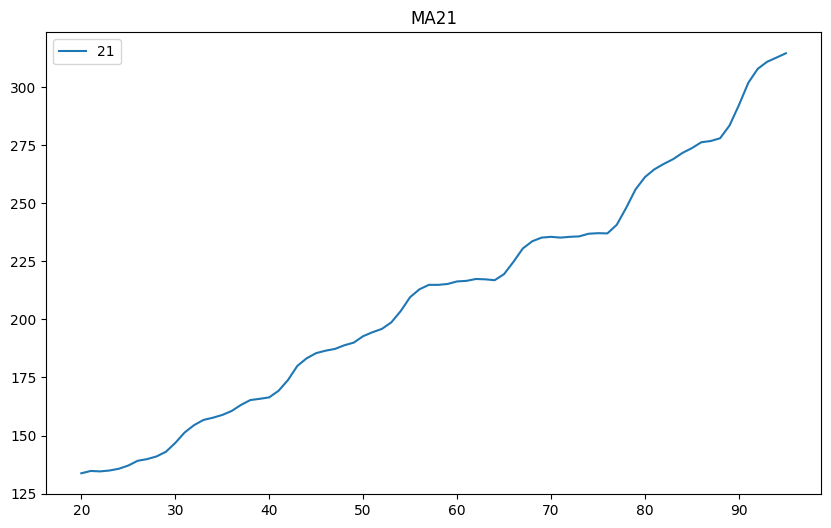

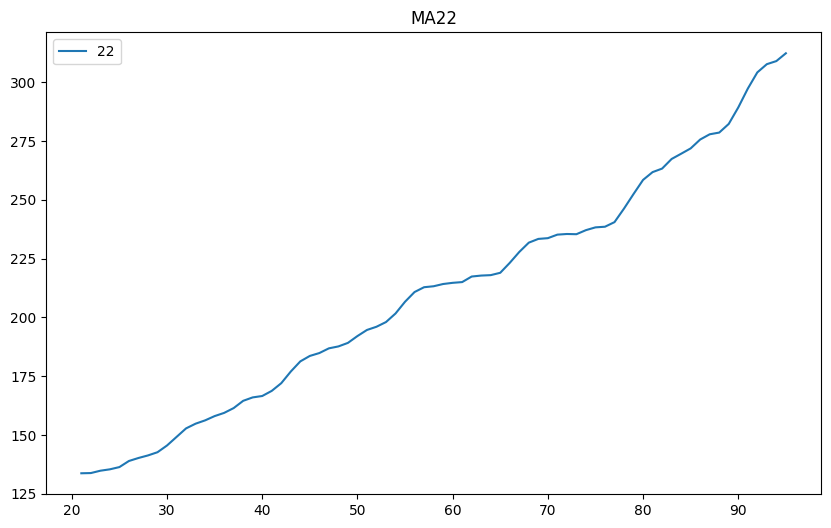

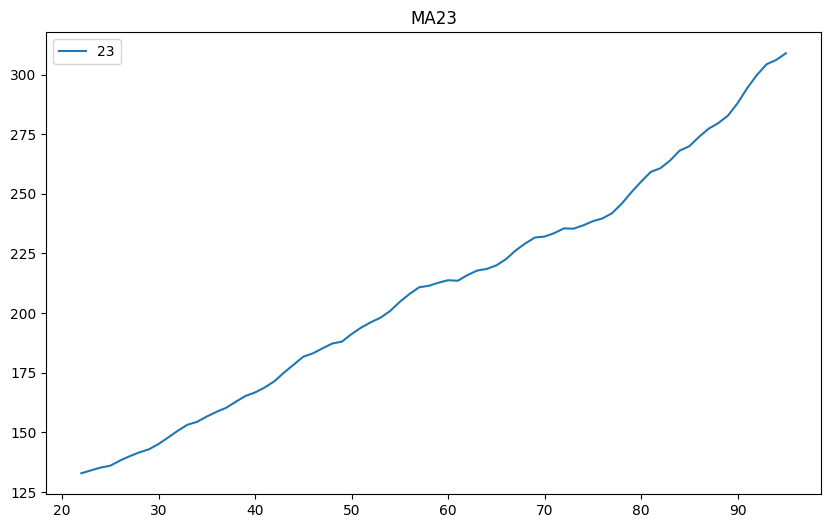

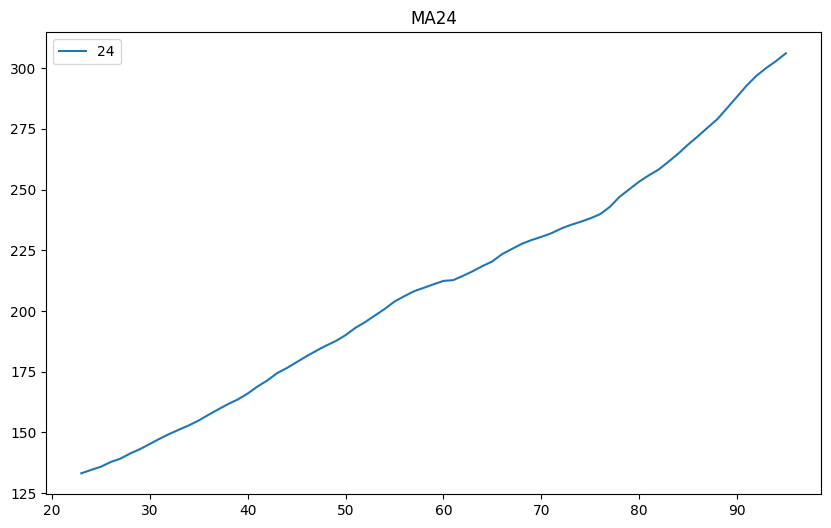

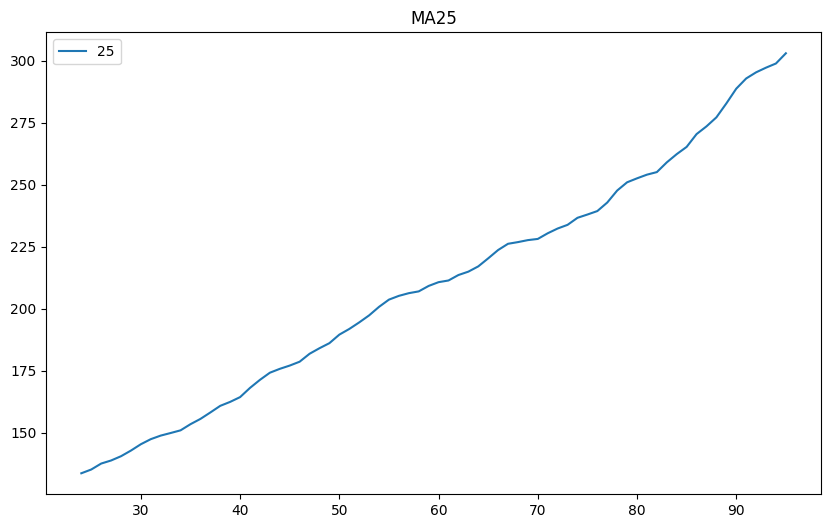

In [12]:
plt.figure(figsize=(10,6))
data.plot()
plt.title('Orginal data')

for i in range(1,26,1):
    plt.figure(figsize=(10,6))
    data["Passengers"].rolling(i).mean().plot(label=str(i))
    plt.title("MA"+str(i))
    plt.legend(loc='best')
    plt.show()

In [24]:
seasonal=seasonal_decompose(data['Passengers'],period=12,two_sided=True,extrapolate_trend=1)

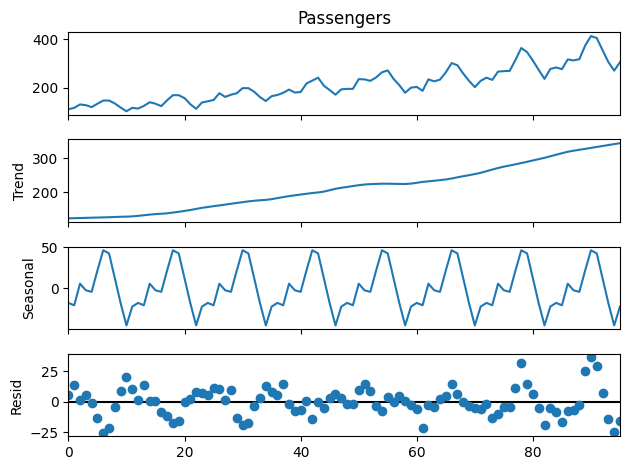

In [25]:
seasonal.plot()
plt.show()

In [26]:
def MAPE(pred,org):
    temp=np.abs((pred-org)/org)*100
    return np.mean(temp)

In [27]:
train=data.head(76)
test=data.tail(20)

In [29]:
test.index[-1]

95

In [34]:
model=SimpleExpSmoothing(train['Passengers']).fit(smoothing_level=0.2)
pred=model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred,test.Passengers)

20.42662222246686

In [37]:
x=np.linspace(0.1,1,25)

for i in x:
    model=SimpleExpSmoothing(train['Passengers']).fit(smoothing_level=i)
    pred=model.predict(start=test.index[0],end=test.index[-1])
    x=MAPE(pred,test.Passengers)
    print("Smoothing",i,'  ==>','MAPE',x)

Smoothing 0.1   ==> MAPE 22.757270212819556
Smoothing 0.1375   ==> MAPE 21.50057327771913
Smoothing 0.175   ==> MAPE 20.77965698182525
Smoothing 0.2125   ==> MAPE 20.271073947338824
Smoothing 0.25   ==> MAPE 19.851319285325822
Smoothing 0.2875   ==> MAPE 19.464390215990925
Smoothing 0.32499999999999996   ==> MAPE 19.084434595913073
Smoothing 0.36250000000000004   ==> MAPE 18.701828100828386
Smoothing 0.4   ==> MAPE 18.31609625788075
Smoothing 0.4375   ==> MAPE 17.931507847629533
Smoothing 0.475   ==> MAPE 17.55419244286572
Smoothing 0.5125   ==> MAPE 17.19034991438938
Smoothing 0.5499999999999999   ==> MAPE 16.845270985831572
Smoothing 0.5875   ==> MAPE 16.5229295477045
Smoothing 0.625   ==> MAPE 16.225944456172137
Smoothing 0.6625   ==> MAPE 15.955752887298448
Smoothing 0.7   ==> MAPE 15.712881914599915
Smoothing 0.7374999999999999   ==> MAPE 15.49724344326215
Smoothing 0.7749999999999999   ==> MAPE 15.308407443028447
Smoothing 0.8125   ==> MAPE 15.145829789694355
Smoothing 0.85   ==>

In [39]:
model2=Holt(data['Passengers']).fit(smoothing_level=0.7,smoothing_slope=0.3)
pred1=model2.predict(start=test.index[0],end=test.index[-1])
MAPE(pred1,test.Passengers)

12.135283441297627

In [46]:
b=np.arange(0.1,1,0.1)
c=np.arange(0.1,1,0.1)
l=[]
for i in b:
    for j in c:
        model=Holt(data['Passengers']).fit(smoothing_level=i,smoothing_slope=j)
        pred=model.predict(start=test.index[0],end=test.index[-1])
        x=MAPE(pred,test.Passengers)
        print("smoothing_level",i,"===>","smoothing_slope",j,'MAPE',x)
        l.append((i,j,x))

smoothing_level 0.1 ===> smoothing_slope 0.1 MAPE 12.870737001886516
smoothing_level 0.1 ===> smoothing_slope 0.2 MAPE 13.499429976094607
smoothing_level 0.1 ===> smoothing_slope 0.30000000000000004 MAPE 14.049214494504195
smoothing_level 0.1 ===> smoothing_slope 0.4 MAPE 14.418845979200006
smoothing_level 0.1 ===> smoothing_slope 0.5 MAPE 14.798434146776628
smoothing_level 0.1 ===> smoothing_slope 0.6 MAPE 15.334096564808291
smoothing_level 0.1 ===> smoothing_slope 0.7000000000000001 MAPE 15.962252479460863
smoothing_level 0.1 ===> smoothing_slope 0.8 MAPE 16.534455361398617
smoothing_level 0.1 ===> smoothing_slope 0.9 MAPE 17.26901427784874
smoothing_level 0.2 ===> smoothing_slope 0.1 MAPE 13.489032953455284
smoothing_level 0.2 ===> smoothing_slope 0.2 MAPE 14.60742721847742
smoothing_level 0.2 ===> smoothing_slope 0.30000000000000004 MAPE 15.719718319411148
smoothing_level 0.2 ===> smoothing_slope 0.4 MAPE 16.948563938574924
smoothing_level 0.2 ===> smoothing_slope 0.5 MAPE 18.35886

In [47]:
f=pd.DataFrame(l,columns=['smoothing_level','smoothing_slope','score'])
f.sort_values(['score'])

,smoothing_level,smoothing_slope,score
80,0.9,0.9,10.026285
79,0.9,0.8,10.062499
78,0.9,0.7,10.218572
72,0.9,0.1,10.381870
77,0.9,0.6,10.436599
...,...,...,...
24,0.3,0.7,19.187827
14,0.2,0.6,19.968760
15,0.2,0.7,21.692985
16,0.2,0.8,23.281647


In [48]:
model2=Holt(data['Passengers']).fit(smoothing_level=0.9,smoothing_slope=0.9)
pred1=model2.predict(start=test.index[0],end=test.index[-1])
MAPE(pred1,test.Passengers)

10.026285095406061

In [49]:
model3=ExponentialSmoothing(train["Passengers"],seasonal='add',trend='add',seasonal_periods=12).fit()
pred3=model3.predict(start=test.index[0],end=test.index[-1])
MAPE(pred3,test.Passengers)

8.724206745976666

In [51]:
model3.forecast(10)

76    266.023106
77    286.523078
78    307.523044
79    309.356293
80    285.856327
81    262.856391
82    241.856327
83    263.356318
84    267.438441
85    268.295579
dtype: float64